In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Combining dataframes

In [3]:
# Reading CSV files
d1 = pd.read_csv('g_aqii_results.csv')
d2 = pd.read_csv('trargon_aqii_results.csv')

# Combining dataframes
combined_df = pd.concat([d1, d2], ignore_index=True)

# Display the combined dataframe
print(combined_df.head())

# Optionally, save the combined dataframe to a new CSV file
combined_df.to_csv('gee_trara.csv', index=False)

            name    months  year        date  pm25_aqi  pm10_aqi  o3_aqi  \
0  Geelong South   January  2020  2020-01-01      77.0      42.0    48.0   
1  Geelong South  February  2020  2020-02-01      24.0      16.0    31.0   
2  Geelong South     March  2020  2020-03-01      20.0      19.0    35.0   
3  Geelong South     April  2020  2020-04-01      26.0      14.0    35.0   
4  Geelong South       May  2020  2020-05-01      27.0      13.0    31.0   

   no2_aqi  so2_aqi  overall_aqi  
0     11.0      3.0         77.0  
1      6.0      1.0         31.0  
2     10.0      2.0         35.0  
3     11.0      1.0         35.0  
4     15.0      2.0         31.0  


##### Computing Summary Statistics on the AQIs

In [6]:
# Load the cleaned data
fnew = pd.read_csv('gee_trara.csv')

# Get the list of parameters excluding 'name', 'months', 'year', 'date'
parameters = fnew.columns.drop(['name', 'months', 'year', 'date'])

# Summary Statistics
summary_stats = fnew.groupby('name')[parameters].agg(['mean', 'median', 'std', 'min', 'max'])
print("Summary Statistics:")
summary_stats

# Comparative Analysis
avg_aqi = fnew.groupby('name')[parameters].mean().sort_values(parameters[0], ascending=False)
print("\nCities ranked by average AQI (using first parameter):")
print(avg_aqi)

# Best and worst air quality
best_city = avg_aqi.head(1)
worst_city = avg_aqi.tail(1)
print("\nAmong the 2 the city with best air quality:")
print(best_city)
print("\nAmong the 2 the city with worst air quality:")
print(worst_city)

# Export to Excel
with pd.ExcelWriter('geeTrara_aqi_analysis.xlsx') as writer:
    summary_stats.to_excel(writer, sheet_name='Summary Statistics')
    avg_aqi.to_excel(writer, sheet_name='City Rankings')
    best_city.to_excel(writer, sheet_name='Best Air Quality')
    worst_city.to_excel(writer, sheet_name='Worst Air Quality')

print("\nData exported to 'geeTrara_aqi_analysis.xlsx'")


Summary Statistics:

Cities ranked by average AQI (using first parameter):
                pm25_aqi   pm10_aqi     o3_aqi    no2_aqi   so2_aqi  \
name                                                                  
Traralgon      33.588235  16.705882  31.058824  10.941176  3.411765   
Geelong South  28.529412  18.882353  34.294118  10.882353  3.176471   

               overall_aqi  
name                        
Traralgon        38.058824  
Geelong South    37.058824  

Among the 2 the city with best air quality:
            pm25_aqi   pm10_aqi     o3_aqi    no2_aqi   so2_aqi  overall_aqi
name                                                                        
Traralgon  33.588235  16.705882  31.058824  10.941176  3.411765    38.058824

Among the 2 the city with worst air quality:
                pm25_aqi   pm10_aqi     o3_aqi    no2_aqi   so2_aqi  \
name                                                                  
Geelong South  28.529412  18.882353  34.294118  10.882353  3

#### Analyzing yearly trends and exporting it in excel

In [7]:
# Yearly trends
yearly_avg = fnew.groupby(['name', 'year'])[parameters].mean().reset_index()
print("Yearly trends:")
print(yearly_avg)

# Seasonal patterns
seasonal_avg = fnew.groupby(['name', 'months'])[parameters].mean().reset_index()
print("\nSeasonal patterns:")
print(seasonal_avg)

# Convert 'date' to datetime 
fnew['date'] = pd.to_datetime(fnew['date'])

# Export to Excel
with pd.ExcelWriter('geeTrara_aqi_trends.xlsx') as writer:
    yearly_avg.to_excel(writer, sheet_name='Yearly Trends', index=False)
    seasonal_avg.to_excel(writer, sheet_name='Seasonal Patterns', index=False)

Yearly trends:
            name  year   pm25_aqi  pm10_aqi     o3_aqi    no2_aqi   so2_aqi  \
0  Geelong South  2020  30.083333     18.75  35.916667  10.833333  1.916667   
1  Geelong South  2021  24.800000     19.20  30.400000  11.000000  6.200000   
2      Traralgon  2020  35.833333     17.25  31.833333  11.333333  3.000000   
3      Traralgon  2021  28.200000     15.40  29.200000  10.000000  4.400000   

   overall_aqi  
0    39.833333  
1    30.400000  
2    40.583333  
3    32.000000  

Seasonal patterns:
             name     months  pm25_aqi  pm10_aqi  o3_aqi  no2_aqi  so2_aqi  \
0   Geelong South      April      27.0      16.0    33.5     12.0      1.0   
1   Geelong South     August      23.0      14.0    41.0     11.0      2.0   
2   Geelong South   December      20.0      18.0    30.0      5.0      4.0   
3   Geelong South   February      22.5      18.0    30.5      7.5      1.0   
4   Geelong South    January      50.0      31.5    39.0      8.0     16.0   
5   Geelong Sout

##### Visualizaions

#### Trends of each parameter aqi and the over all aqi through out 2 years
- This helps understand variations across cities

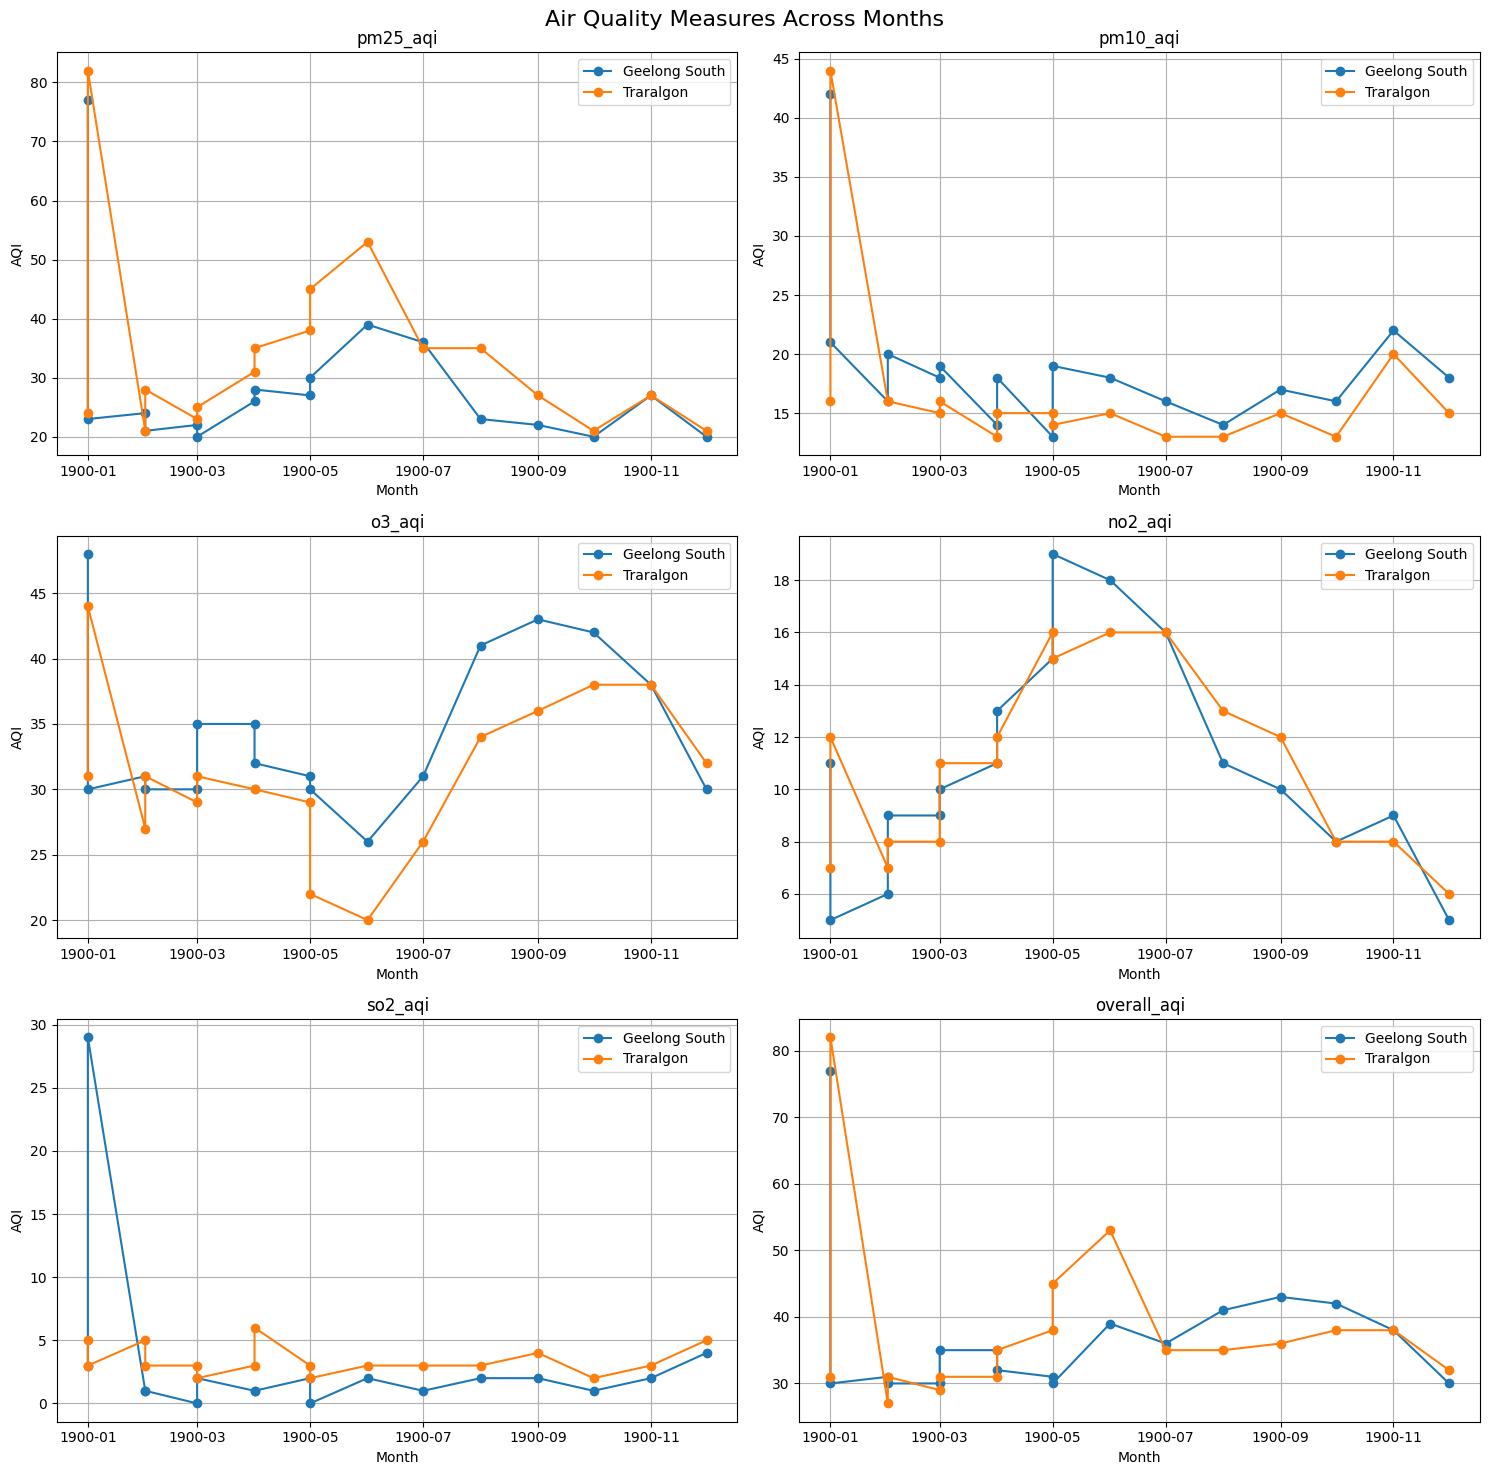

In [32]:

# Convert 'months' to datetime for proper ordering
fnew['months'] = pd.to_datetime(fnew['months'], format='%B %Y')

# Sort the dataframe by date
fnew = fnew.sort_values('months')

# Create a figure with subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Air Quality Measures Across Months', fontsize=16)

# List of measures to plot
measures = ['pm25_aqi', 'pm10_aqi', 'o3_aqi', 'no2_aqi', 'so2_aqi','overall_aqi']

# Plot each measure
for i, measure in enumerate(measures):
    ax = axs[i//2, i%2]
    for name in fnew['name'].unique():
        data = fnew[fnew['name'] == name]
        ax.plot(data['months'], data[measure], label=name, marker='o')
    ax.set_title(measure)
    ax.set_xlabel('Month')
    ax.set_ylabel('AQI')
    ax.legend()
    ax.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

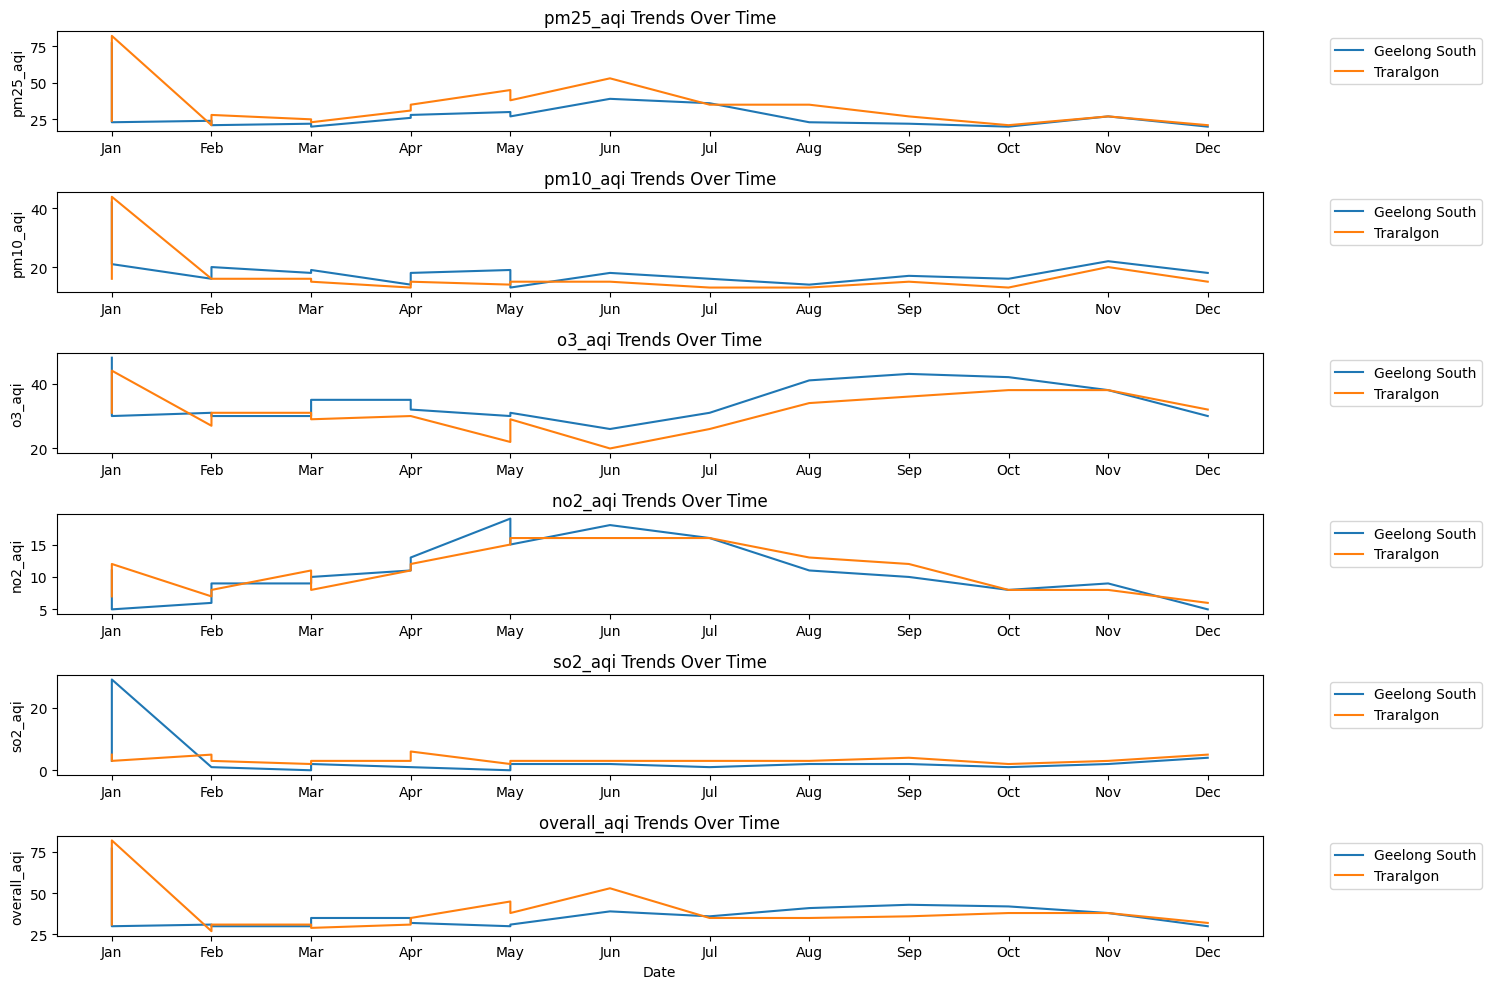

In [31]:
# Time series plots
plt.figure(figsize=(15, 10))
for i, param in enumerate(parameters, 1):
    plt.subplot(len(parameters), 1, i)
    for city in fnew['name'].unique():
        city_data = fnew[fnew['name'] == city]
        plt.plot(city_data['month'], city_data[param], label=city)
    plt.ylabel(param)
    if i == len(parameters):
        plt.xlabel('Date')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(f'{param} Trends Over Time')
plt.tight_layout()
plt.show()


##### Parameter trends with in a city
- This helps understand which parameter has significant effect in a particular city

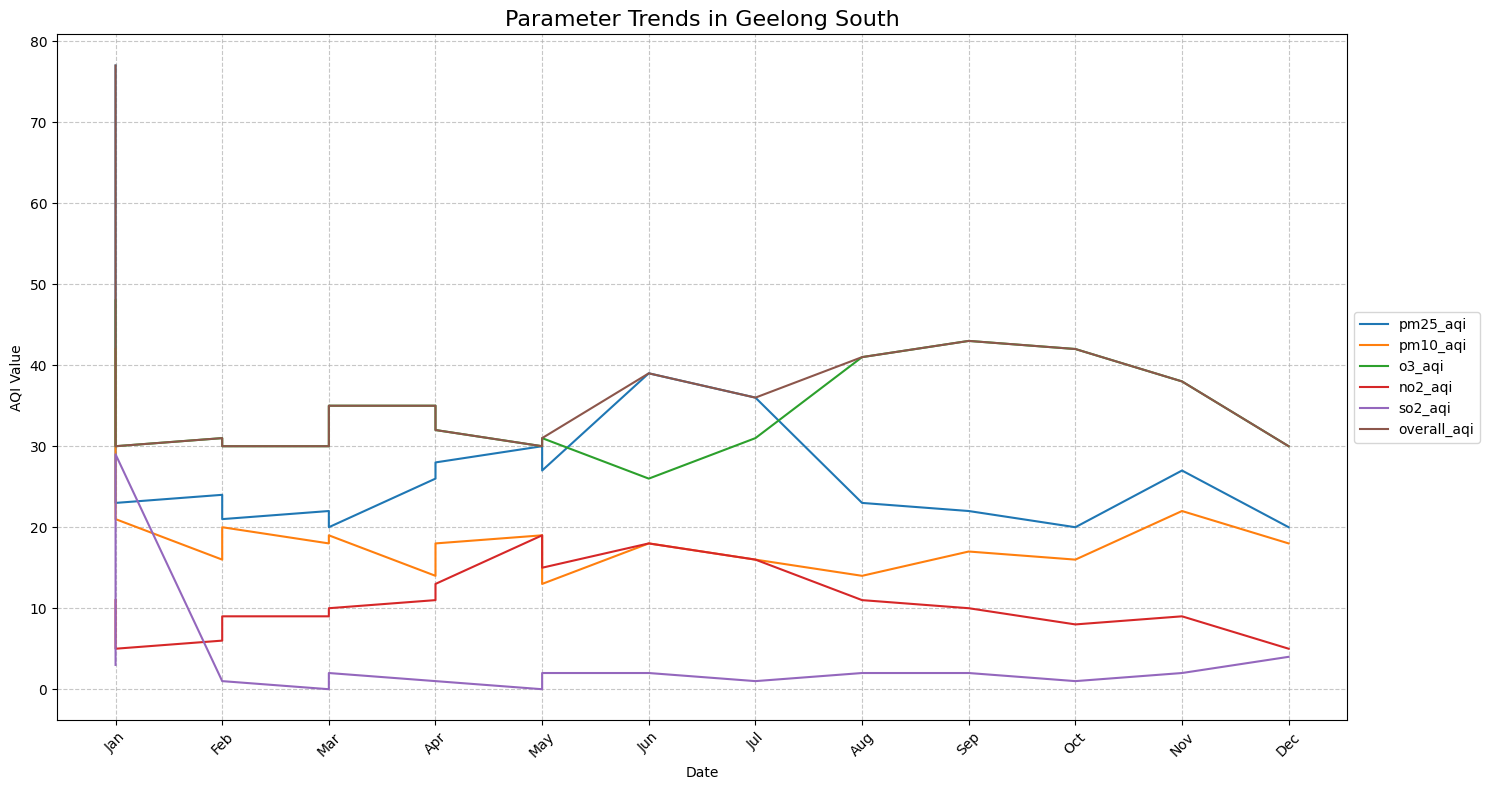

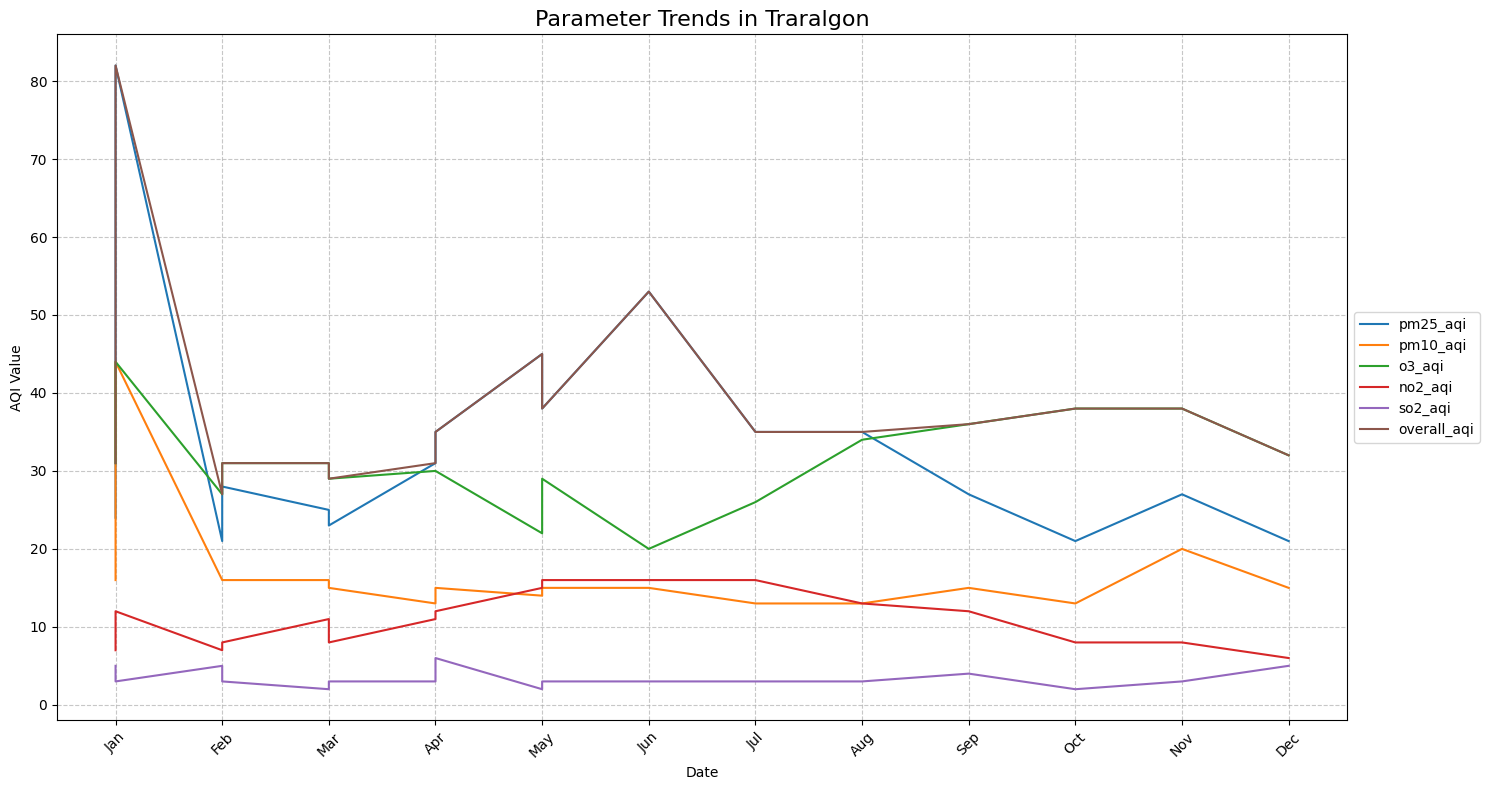

In [28]:
# Comparison of parameter trends within each city using a single plot
for city in fnew['name'].unique():
    city_data = fnew[fnew['name'] == city]
    
    plt.figure(figsize=(15, 8))
    for param in parameters:
        plt.plot(city_data['month'], city_data[param], label=param)
    
    plt.title(f'Parameter Trends in {city}', fontsize=16)
    plt.xlabel('Date')
    plt.ylabel('AQI Value')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

#### Plotting monthly variations
- Understanding the monthly variations of the aqi across the cities

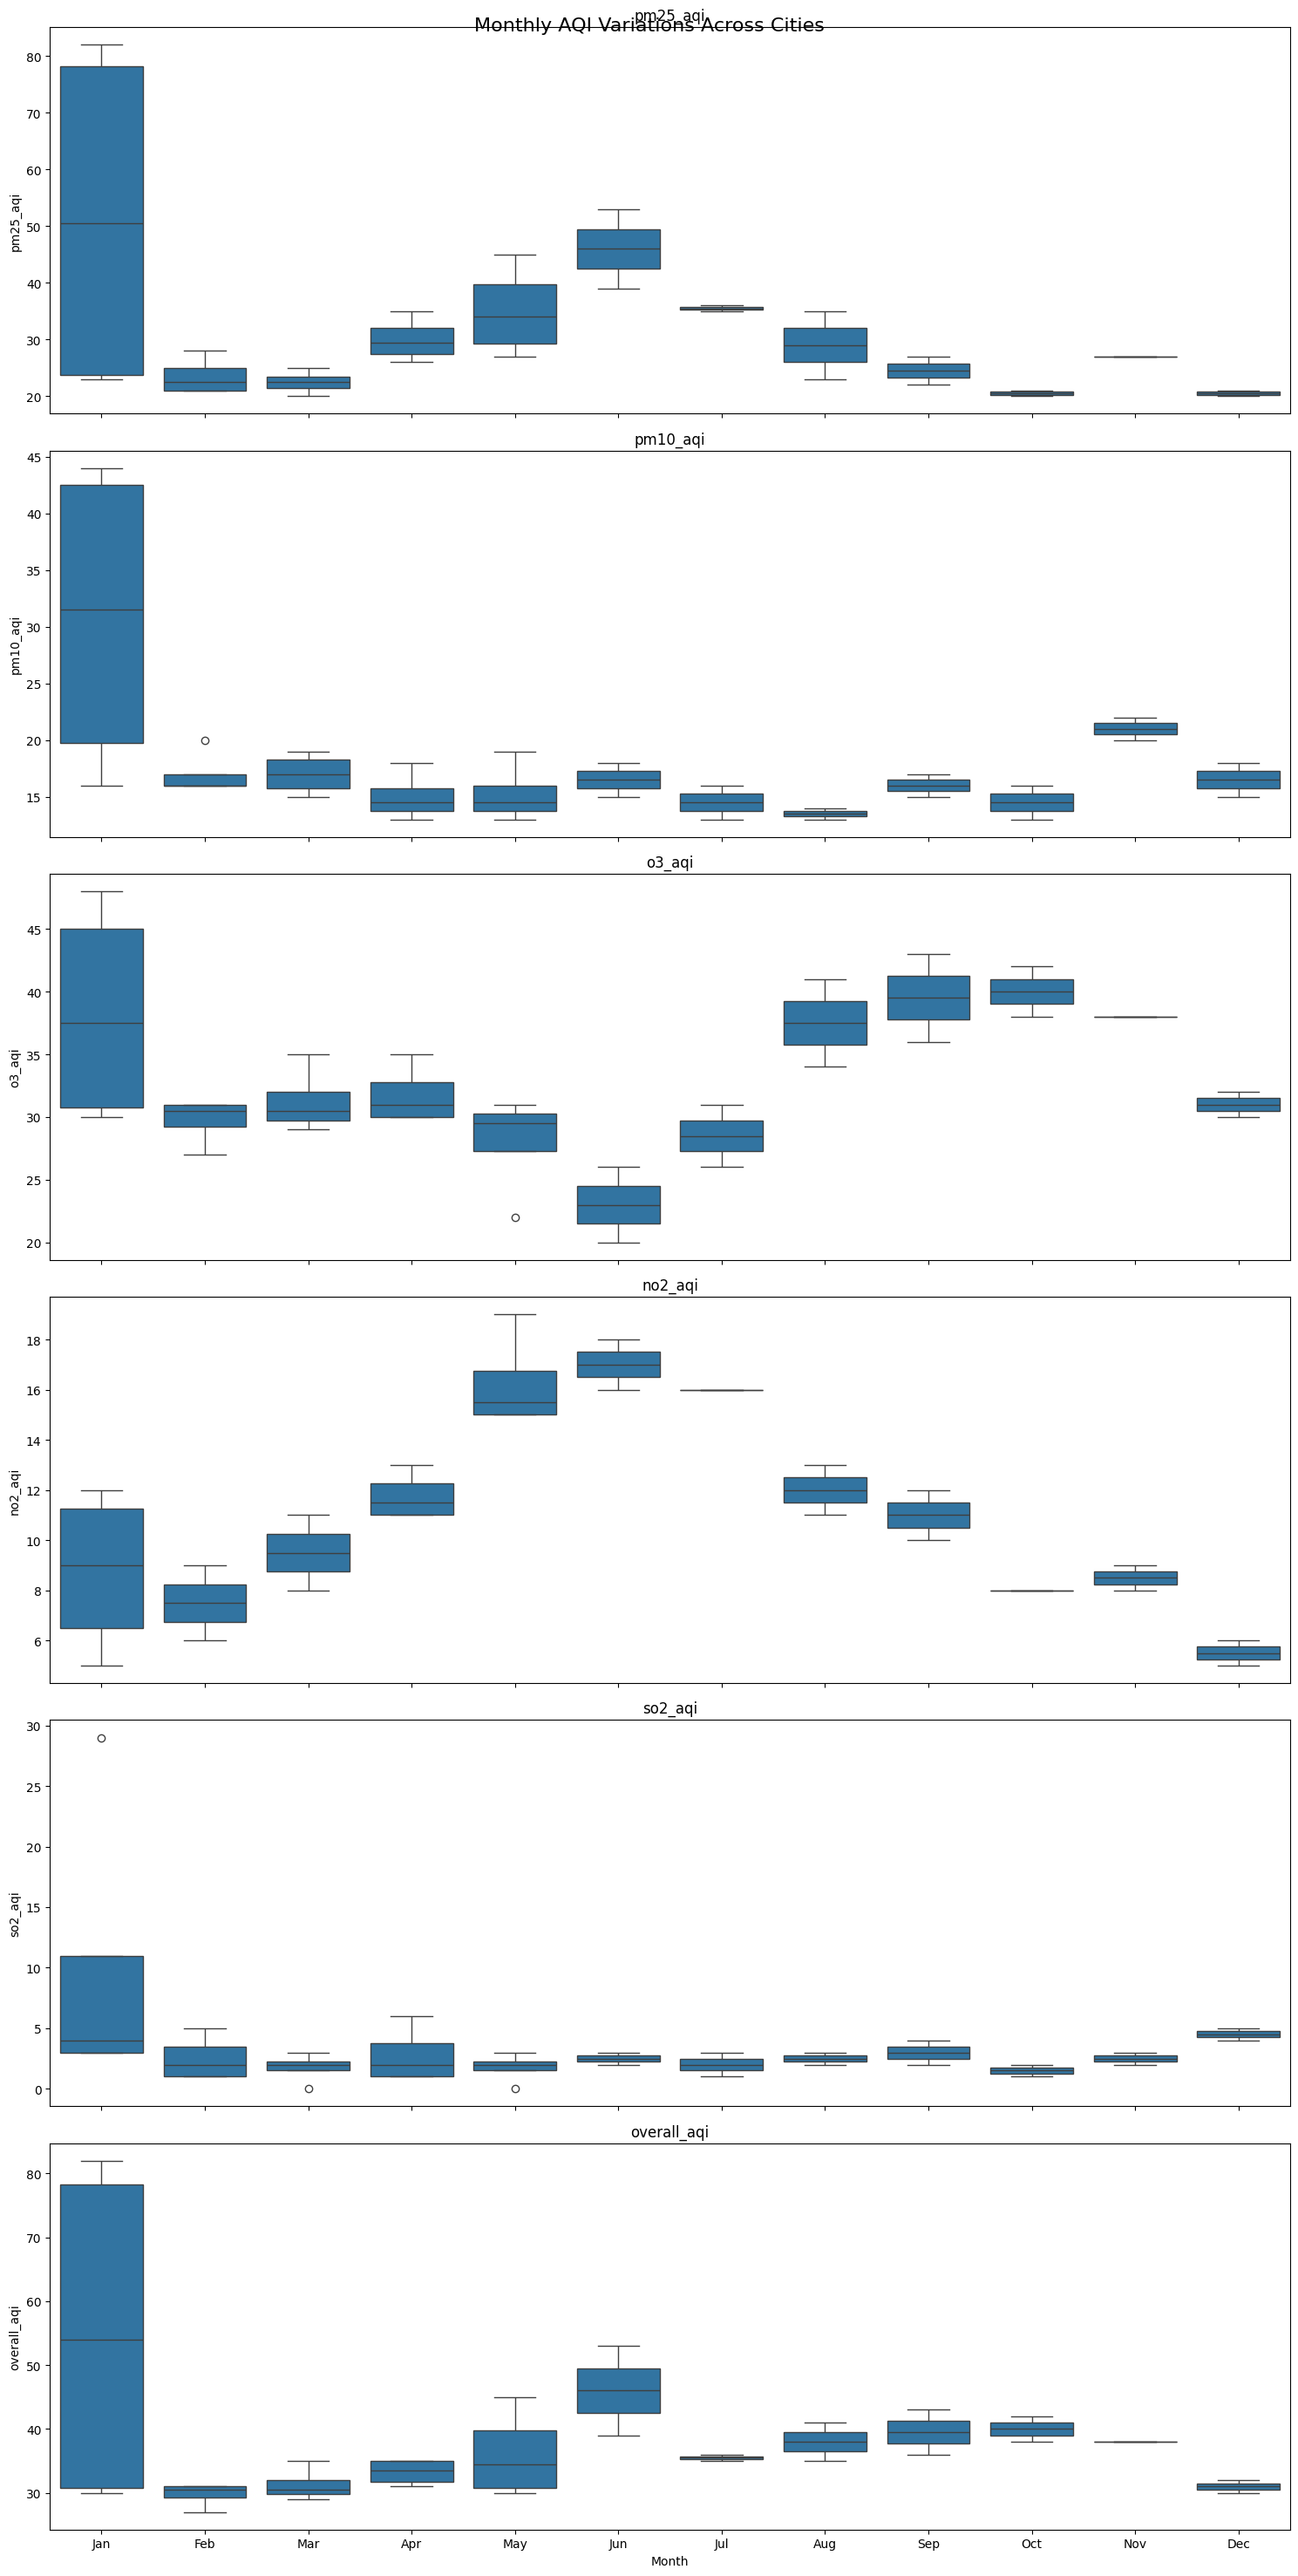

In [29]:
# 2. Box plot for monthly variations across cities
fnew['month'] = fnew['date'].dt.strftime('%b')  # Convert to Jan, Feb, etc. format
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, axes = plt.subplots(len(parameters), 1, figsize=(15, 5*len(parameters)), sharex=True)
fig.suptitle('Monthly AQI Variations Across Cities', fontsize=16)

for i, param in enumerate(parameters):
    sns.boxplot(x='month', y=param, data=fnew, ax=axes[i], order=month_order)
    axes[i].set_title(param)
    axes[i].set_xlabel('')

axes[-1].set_xlabel('Month')
plt.tight_layout()
plt.show()

##### Monthly AQI variation throughout the years

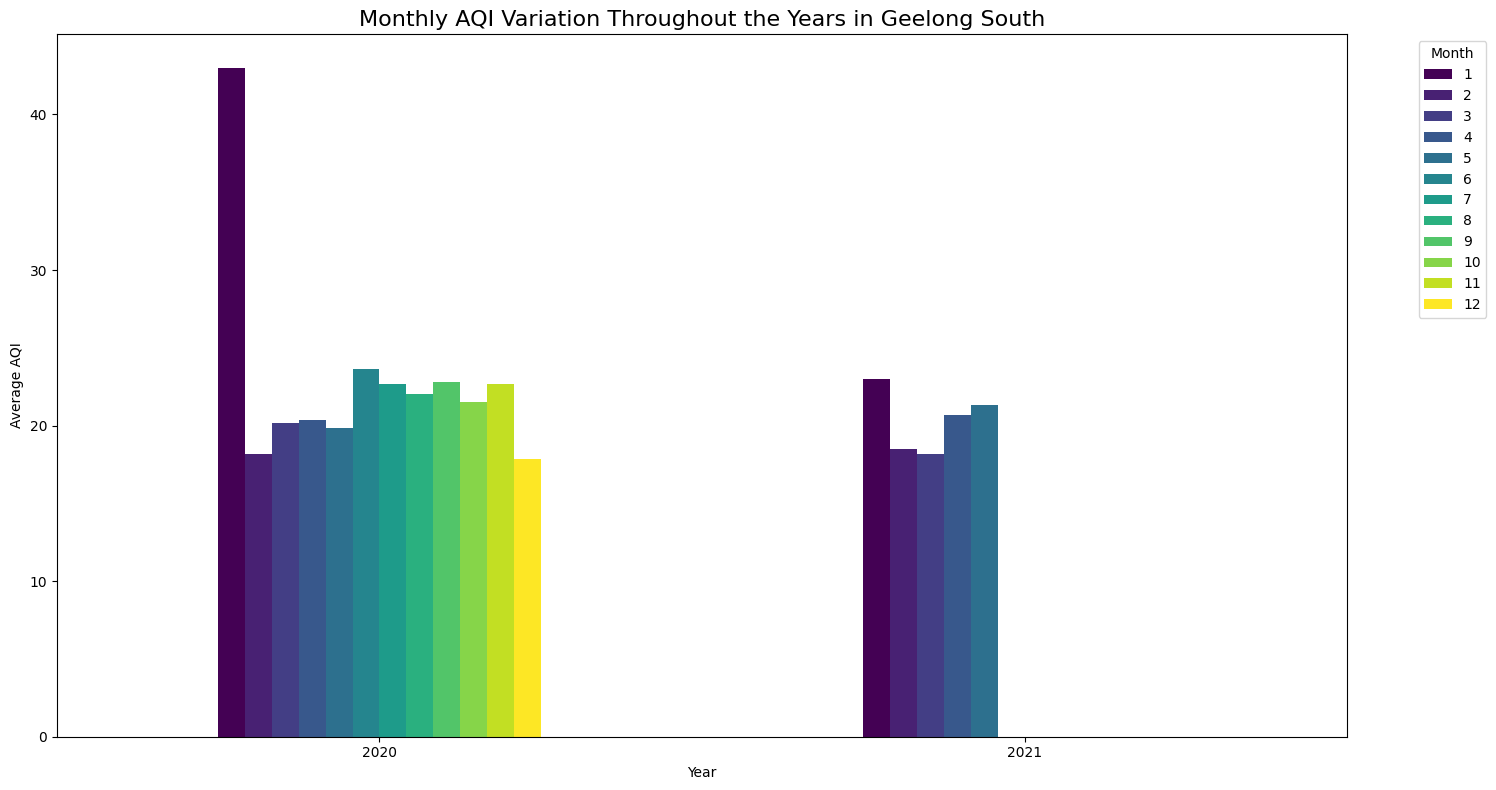

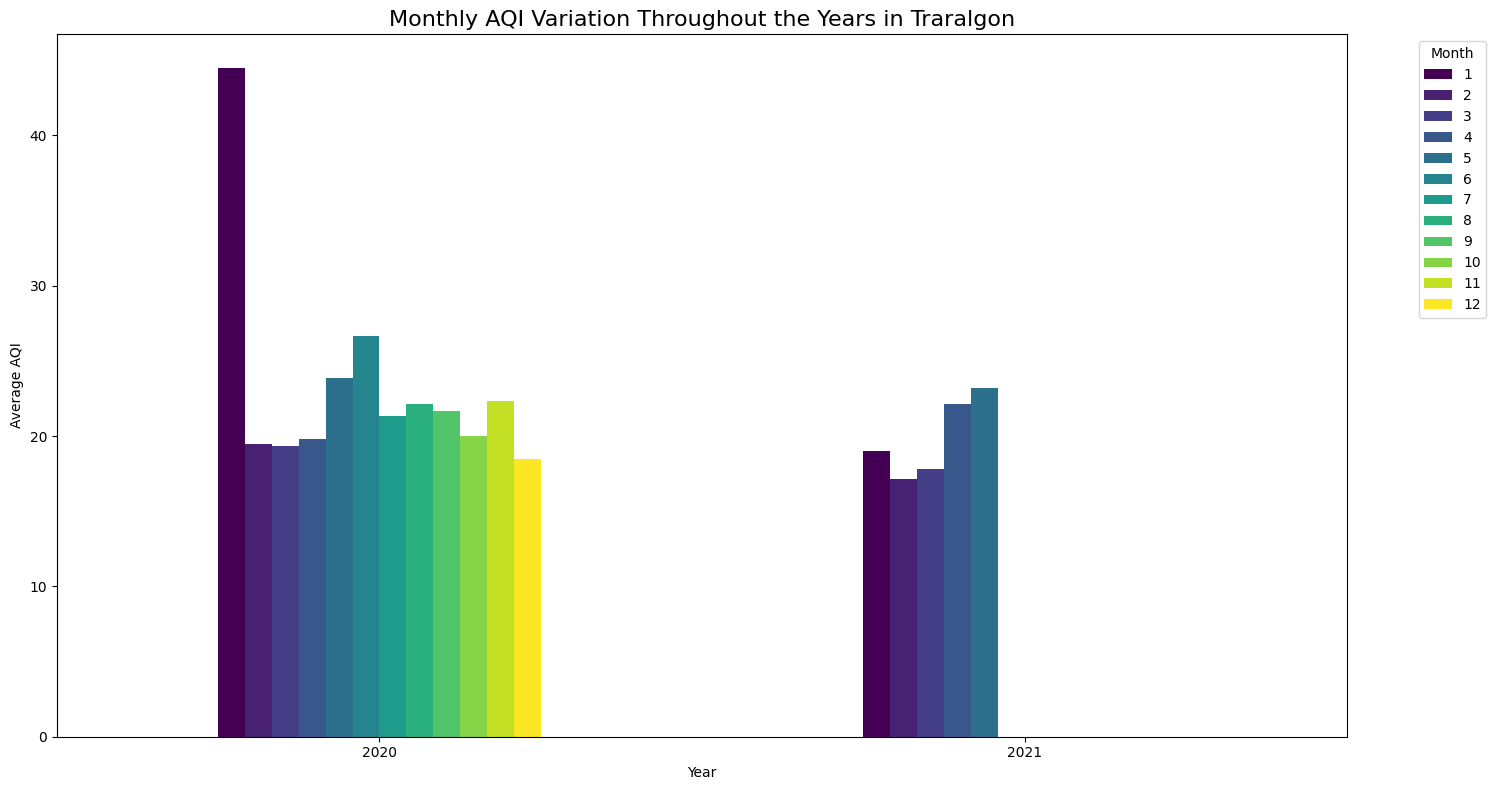

In [30]:
# Ensure 'date' column is in datetime format
fnew['date'] = pd.to_datetime(fnew['date'])

# Step 1: Calculate the monthly average AQI for each city
fnew['month'] = fnew['date'].dt.strftime('%b')  # Convert to Jan, Feb, etc. format
fnew['year'] = fnew['date'].dt.year

# If 'AQI' is not a direct column, calculate an average AQI from the parameters
if 'AQI' not in fnew.columns:
    fnew['AQI'] = fnew[parameters].mean(axis=1)

# Calculate monthly average AQI for each city
monthly_avg = fnew.groupby(['name', 'year', 'month'])['AQI'].mean().reset_index()

# Convert the 'month' column back to an integer format for proper sorting
fnew['month_num'] = fnew['date'].dt.month

# Step 2: Plot a bar graph for each city showing the monthly variations of AQI throughout the years
for city in fnew['name'].unique():
    city_data = fnew[fnew['name'] == city]
    monthly_avg_city = city_data.groupby(['year', 'month_num'])['AQI'].mean().reset_index()

    # Pivot the data to get months as columns and years as rows
    monthly_avg_city_pivot = monthly_avg_city.pivot(index='year', columns='month_num', values='AQI')
    monthly_avg_city_pivot = monthly_avg_city_pivot.reindex(columns=range(1, 13))  # Ensure all months are included

    # Plotting the bar graph
    monthly_avg_city_pivot.plot(kind='bar', figsize=(15, 8), colormap='viridis')
    plt.title(f'Monthly AQI Variation Throughout the Years in {city}', fontsize=16)
    plt.xlabel('Year')
    plt.ylabel('Average AQI')
    plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
